In [9]:
import sys
import numpy as np

In [10]:
# TODO: is the 0 weights random or just with index larger than k
n = 500
d = 1000
k = 100
sigma = 1


train_x = np.random.normal(0,1, (n,d))


# use two np arange?
non_empty_weights = np.arange(k)
# w = np.zeros(d) # initial weights ready for training
true_w = np.zeros(d)
true_w[non_empty_weights] = 1  # it's only for generating data
w = np.zeros(d)
print(w.shape)

train_y = train_x.dot(true_w) + np.random.normal(0,1, n)

print(train_x)
print(train_y)

(1000,)
[[-0.13819953  1.13393376  0.24199325 ... -0.2239446   1.02846405
  -0.05827692]
 [ 2.43614543  0.37983609 -0.04953126 ...  1.25649751  0.72098792
  -0.02565477]
 [ 0.32762328  0.59763087  1.40309335 ... -0.93150178 -0.65235579
   1.45051658]
 ...
 [-0.40658607  1.77524535 -0.4208692  ...  1.2967607  -3.04392907
  -0.93542171]
 [-0.48290602 -0.53986137 -0.00811075 ...  1.58323867  1.49325329
   2.2258025 ]
 [-0.13948833 -1.20918153  0.95978756 ... -1.31349699  0.26313616
   1.44257026]]
[ 1.19058624e+00  6.43347028e+00 -8.24881373e+00 -9.98992265e+00
 -6.36445806e+00  7.18652580e+00 -1.87156914e+01 -5.93392484e+00
 -1.71707313e+00 -3.16561791e+00  1.17601056e+01 -8.77782229e+00
 -1.69778341e+01 -2.37987753e+01 -5.86190361e+00  7.96198447e+00
  1.26057012e+01  4.59792986e+00  4.17586736e+00  5.89906756e+00
 -2.50326037e+01  2.30213590e+00 -7.53178919e+00  1.21561179e+00
 -3.52937461e+01 -1.06962611e+01 -8.53957953e+00  5.59509520e+00
  4.31907632e+00  1.17656884e+01  1.07505680e

In [31]:
a = np.array([0.0])

np.count_nonzero(a)

0

In [48]:
# TODO: regularization path
# it updates values column by column and each time use all data


reg_lambda_l = []
# initialize lambda
for k in range(d):
    reg_lambda = 2*np.abs(np.sum(train_x[:,k] *(train_y-np.average(train_y))   ,axis=0))
    reg_lambda_l.append(reg_lambda)
reg_lambda = max(reg_lambda_l)

print("max_lambda: ", reg_lambda)


num_nonzero_l = []
reg_lambda_l = []
reg_lambda_l.append(reg_lambda)

objective_val_l = []

FDR_l = []
TPR_l = []
true_k = 100


w_updates = [np.zeros(d)] # initialize how much w_updates
w_prev = np.zeros(d)
b_l = [(1/n)*np.sum( train_y - train_x.dot(w))]
while reg_lambda > 1e-2:  # TODO
    max_update = sys.maxsize
#     # for each lambda solution, compute w from zero vector
#     w_prev = np.zeros(d)
    w = w_updates[-1]
    w = w_prev
    b = b_l[-1]
    
    count = 0
    
    while max_update >= 0.05: # condition for not converge
        # pre-compute a
        # as a is fixed and solely depends on X
        a = 2*np.sum(train_x**2, axis = 0)  # axis = 0 by default
    #     print(a.shape)
        for k in range(d):
            excluded_train_x = np.delete(train_x, k, axis = 1)
            excluded_w = np.delete(w, k)
            # calculate the cost
            c_k = 2*np.sum(train_x[:,k]*(train_y- (b+ excluded_train_x.dot(excluded_w))  )  )
            # update weights
            if c_k < -reg_lambda:
                w[k]= (c_k+reg_lambda)/a[k]
            elif c_k > reg_lambda:
                w[k] = (c_k- reg_lambda)/a[k]
            else:
                w[k] = 0
            
        # sanity check
        obj_val = np.sum(  (train_x.dot(w) + b - train_y)**2 )+ np.sum(reg_lambda * np.absolute(w))
        objective_val_l.append(obj_val)
        
        w_updates.append(np.array(w))  # append the updated w
        b = (1/n)*np.sum( train_y - train_x.dot(w))
        b_l.append(b)

        if len(w_updates) > 2:  # TODO: maximum 
            print("w_updates ", len(w_updates))
            max_update = np.max(w_updates[-1]-w_updates[-2])
            print("maximum update ",  max_update)
            if max_update == 0: # skip zero weight matrix
                break
        w_prev = w
#     correct_num_nonzero = np.sum((w != 0) * (true_w != 0))
    k = 100
    correct_num_nonzero = np.sum( w[:k] != 0)
    
#     print("w: ", w)
#     print("true_w", true_w)
    print("correct_num_nonzero: ", correct_num_nonzero)
    count += 1
    if count >= 10:
        break
    
    incor_num_nonzero = np.sum( w[k:] != 0 )
    
    # keep track of number of nonzero for each solution
    num_nonzero = np.sum(w != 0)
    num_nonzero_l.append(num_nonzero)
    # FDR
    if num_nonzero == 0:
        # invalid number of nonzero
        FDR_l.append(0.0)
    else:
        FDR_l.append(incor_num_nonzero/num_nonzero)
    # TPR
    TPR_l.append(correct_num_nonzero/true_k)
    
#     print("FDR_l ", FDR_l)
#     print("TPR_l: ", TPR_l)
#     break
    
    # regularization lambda
    reg_lambda = reg_lambda*0.5
    reg_lambda_l.append(reg_lambda)
    print("new lambda: ", reg_lambda)

max_lambda:  2482.1947209547843
w_updates  3
maximum update  0.0
correct_num_nonzero:  0
new lambda:  1241.0973604773922
w_updates  4
maximum update  1.1756687405758472
w_updates  5
maximum update  0.0537075452445851
w_updates  6
maximum update  0.0321860046659469
correct_num_nonzero:  31
new lambda:  620.5486802386961
w_updates  7
maximum update  0.6911326697008765
w_updates  8
maximum update  0.17530284941980648
w_updates  9
maximum update  0.034883310057995054
correct_num_nonzero:  79
new lambda:  310.27434011934804
w_updates  10
maximum update  0.41389853481267297
w_updates  11
maximum update  0.13374859716932552
w_updates  12
maximum update  0.061330236459921306
w_updates  13
maximum update  0.030949997648543337
correct_num_nonzero:  99
new lambda:  155.13717005967402
w_updates  14
maximum update  0.26300150845799586
w_updates  15
maximum update  0.11981032882211368
w_updates  16
maximum update  0.07245128346166074
w_updates  17
maximum update  0.04044997480440132
correct_num_nonz

In [13]:
# sanity check continue
count = 0
for i in range(1,len(objective_val_l)):
    if objective_val_l[i-1] < objective_val_l[i]:
        count += 1
print("number of wrong optimization: " , count)
print(objective_val_l)

number of wrong optimization:  0
[56515.896511009174, 56515.896511009174, 53215.25117797921, 53089.02605322361, 53087.4198615823, 53087.350316255404, 53087.349240609394, 41184.28973563168, 40547.4012845456, 40518.51378724196, 40515.58161539094, 40515.15086591176, 25876.502163661047, 25597.196693571914, 25567.842941649764, 25561.596521360567, 25560.088622103467, 25559.676367518423, 25559.54816737496, 14523.106310459938, 14395.449960735843, 14365.432302481051, 14354.409365383395, 14350.072827481787, 14348.330642500663, 14347.577209163013, 14347.235493479327, 14347.075477705212, 7707.491774286061, 7676.208909966772, 7669.263502687918, 7666.671748192274, 7665.468467093304, 7664.88939361399, 7664.603372856092, 7664.462912845766, 4030.2714650436146, 4019.081101610899, 4016.2906030679683, 4015.3392193188706, 4014.9380710595583, 2088.19283483896, 2082.407475978324, 2080.4682769725277, 2079.4028166979633, 2078.777964764488, 1071.9323051673248, 1068.5001603431606, 1067.1116955545078, 1066.347070

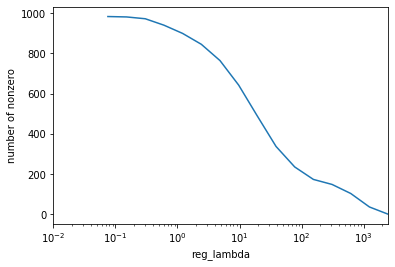

In [22]:
from matplotlib import pyplot as plt
reg_lambda_0 = max(reg_lambda_l)
plt.plot(reg_lambda_l[:-1], num_nonzero_l)
plt.xscale("log")
# plt.xlim(reg_lambda_0, 1e-2) 
plt.xlim(1e-2, reg_lambda_0) 
plt.xlabel("reg_lambda")
plt.ylabel("number of nonzero")
plt.savefig("A4a")
plt.show()


In [42]:
len(w_updates)

31

In [16]:
print(reg_lambda_l)

[2482.1947209547843, 1241.0973604773922, 620.5486802386961, 310.27434011934804, 155.13717005967402, 77.56858502983701, 38.784292514918505, 19.392146257459252, 9.696073128729626, 4.848036564364813, 2.4240182821824066, 1.2120091410912033, 0.6060045705456016, 0.3030022852728008, 0.1515011426364004, 0.0757505713182002, 0.0378752856591001]


In [45]:
print(FDR_l)

print(TPR_l)

[0.0, 0.1388888888888889, 0.23300970873786409, 0.3310810810810811, 0.42196531791907516, 0.574468085106383, 0.7032640949554896, 0.7950819672131147, 0.8442367601246106, 0.8691099476439791, 0.8816568047337278, 0.8887652947719689, 0.8936170212765957, 0.897119341563786, 0.8980632008154944, 0.8982706002034588]
[0.0, 0.31, 0.79, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


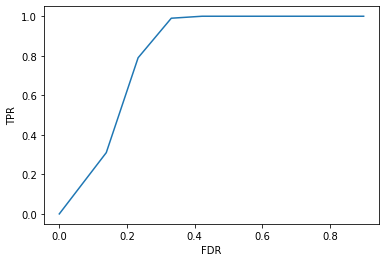

In [49]:
plt.plot(FDR_l, TPR_l)
plt.xlabel("FDR")
plt.ylabel("TPR")
plt.savefig("A4b")
plt.show()